# Quaternion Analysis by Sudbery in 1977, Running Comments by D. Sweetser

A math professor specializing in quaternions recommended I read [a paper on quaternion analysis by A. Sudbery](https://www.researchgate.net/publication/2657821). I was familiar with this work since it is also [available on my web site](https://dougsweetser.github.io/Q/Stuff/pdfs/Quaternionic-analysis-memo.pdf), where my summary was "on why quaternion analysis is no good." There is also a link to his 1979 paper, where I claim: "Please look to my work above on quaternion analysis for a much better alternative!"

This is a disclosure to my bias. I will used this Jupyter notebook to document where I have technical issues with Sudbery's efforts.

To do so in a more precise way, I use my Python Qs library which can manipulate quaternions using symbols or numbers. Load the needed libraries.

In [1]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import unittest

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions.
from Qs import *

from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.container { width:100% !important; }</style>"))

This area of study was started by Fueter in 1935. It was further developed by Deavours. This paper represents a third effort at refinement.

Here is the first equation:

$$q = t + i x + i y +k z \quad(1.1)\,.$$

My experience in programming is with Python. Things should be as human readable as possible. Everything should be explicit. Any jump between symbols and code should be made as small as possible. One reason I now prefer to call this entire subject "space-time number analysis" is to root every discussion to the physical world of ephemeral events in space-time. The "+" notation looks misleading to my eye as $t=1$, $x=1$ does not make $2$, but makes $1 + 1 i$. What plus should only mean is that you start with an element of a defined object, you have another element with the same structure and the combination of those two maintains that structure. I know others accept this notation, but I rather make it explicit that this operation has a different quality so uses a different symbol. I also want the basis for the first term to be made explicit as happens later, let me use "e":

$$q = e t \oplus i x \oplus i y \oplus k z \quad(1.1 \;\rm{revised})\,.$$

I prefer to use tuples as the task of getting $i$'s, $j$'s, and $k$'s just right is removed:

$$q = (t, x, y, z) \quad(1.1 \;\rm{preferred})\,.$$

Using a more direct system of notation is valuable. This also translates well to Python as a tuple or array.

In equation 1.3,

$$\frac{\partial f}{\partial x}+i \frac{\partial f}{\partial y} = 0 \quad(1.3)\,.$$

the author respects the pattern of teaching complex numbers so much as to toss mud into the waters, choosing to let $z = x + i y$. For the sake of consistency, my minimal revised form would be $z = (t, x, 0, 0)$ and $f(z) = (f, F_x, 0, 0)$: 

$$\frac{\partial f}{\partial t} - \frac{\partial F_x}{\partial x} = 0 \quad(1.3\;\rm{minimal \,revision})\,.$$

By inspection, we can see the major theme in all my work: _space-time numbers are complex numbers_ with $y=z=0$. Every and all results done with complex numbers must necessarily be done with space-time numbers where $y=z=0$ and there can be no exceptions. The x-y-z values of a space-time number form a direction in space. Complex values thus represent math done with a consistent direction in space, nothing more. One could work with space-time numbers of the form $q(t, n 1, n 1, 0)$ and get all the same results as in complex analysis because these will all point the same way and have no cross product. To show this numerically,

## Qs Library Development Interlude

When I got to equation 1.3, I realized my Qs library did not have a function to take derivatives of space-time number and series functions. That omission has been corrected with the functions Dq() and Dqs() respectively. As a stringent test, the derivatives were applied to a space-time potential and used to derive the Maxwell source and homogeneous equations (end of interlude).
    
A bigger issue for equation 1.3 is that it omits the other Cauchy-Riemann equation. Let's include both as a complete space-time number expression:

$$(\frac{\partial f}{\partial t} - \frac{\partial F_x}{\partial x}, \frac{\partial F_x}{\partial t} + \frac{\partial f}{\partial x}, 0, 0) = (0, 0, 0, 0) \quad(1.3\;\rm{complete})\,.$$

Test that this is the case for the function series $fs(z) = (z^3, z^4)$:

In [2]:
t, x, y, z = sp.symbols("t x y z")
q_tx = Q([t, x, 0, 0])
z3 = product(product(q_tx, q_tx), q_tx)
z4 = product(q_tx, z3)
z3_z4 = Qs([z3, z4])
z3_z4.display("z3 z4")
D_z3_z4 = Dqs(z3_z4, [t, x, y, z])
print(D_z3_z4)

z3 z4
n=1



n=2



n=1: (0, 0, 0, 0) DQxQxQ
n=2: (0, 0, 0, 0) DQxQxQxQ


As promised, the expected result of complex analysis are necessarily embedded in space-time number series functions.

If one takes the conjugate of the function, then that is not analytic in $z$:

In [3]:
q_tx_c = conj(Q([t, x, 0, 0]))
z3_c = product(product(q_tx_c, q_tx_c), q_tx_c)
z4_c = product(q_tx_c, z3_c)
z3_z4_c = Qs([z3_c, z4_c])
z3_z4_c.display("z3* z4*")
D_z3_z4_c = Dqs(z3_z4_c, [t, x, y, z])
D_z3_z4_c.display()

z3* z4*
n=1



n=2



n=1



n=2


The function $f(z)=(z^*)^3$ is analytic in $z^*$:

In [4]:
D_c_z3_z4_c = Dqs(z3_z4_c, [t, x, y, z], conj=True)
print(D_c_z3_z4_c)

n=1: (0, 0, 0, 0) DQ*xQ*xQ*
n=2: (0, 0, 0, 0) DQ*xQ*xQ*xQ*


For polynomials, the differential operator has to point in the same direction as the complex number.

What will happen if one adds the other imaginaries? Sudbery claims:

$q = (t, x, y, z)$ and $f(q) = (f, F_x, F_y, F_z)$: 

$$\frac{\partial f}{\partial t}  - \frac{\partial F_x}{\partial x}- \frac{\partial F_y}{\partial y} - \frac{\partial F_z}{\partial z} = 0\quad(1.2)\,.$$

or more completely:

$$(\frac{\partial f}{\partial t} - \frac{\partial F_x}{\partial x} - \frac{\partial F_y}{\partial y} - \frac{\partial F_z}{\partial z}, \frac{\partial F_x}{\partial t} + \frac{\partial f}{\partial x}, \frac{\partial F_y}{\partial t} + \frac{\partial f}{\partial y}, \frac{\partial F_z}{\partial t} + \frac{\partial f}{\partial z}) =?= (0, 0, 0, 0) \quad(1.3\;\rm{complete})\,.$$

I am confused (hence the '=?=' notation). I have no issue with the 3-vector part remaining as three zeroes. Because we are _subtracting more stuff_, that has consequences. I cannot expect the scalar to remain zero. It does not in the software as written: 

q3 q4
n=1



n=2


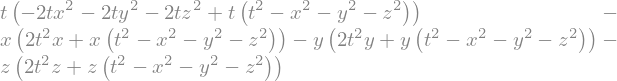

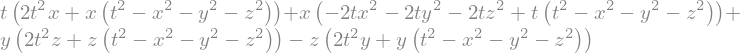

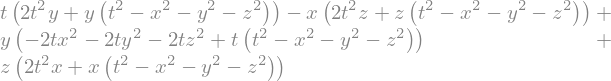

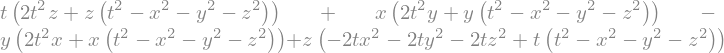


D q3 q4
n=1



n=2


In [5]:
q_txyz = Q([t, x, y, z])
q3 = product(product(q_txyz, q_txyz), q_txyz)
q4 = product(q_txyz, q3)
q3_q4 = Qs([q3, q4])
q3_q4.display("q3 q4")
D_q3_q4 = Dqs(q3_q4, [t, x, y, z])
D_q3_q4.display("D q3 q4")

I did a preliminary investigation to see if there was an elegant way to make the scalar term equal to zero. I did not find one that would work with all polynomials as the details get increasingly complicated.

I would argue that **a non-zero scalar is not bad**. This space-time number function series will commute with any other space-time series of the same state dimension (length of series). The fact that the cross product terms are necessarily zero is a useful thing. 

I am working to be at peace with this observation about a non-zero scalar. One thing that helps is to _know complex analysis is there_ just by simplifying to a space-time number of the form $(f, F_x, 0, 0)$. What happens when thing open up is that a non-zero, _commuting scalar_ is generated. This makes space-time number analysis have the opportunity to be a richer subject. 

## A Bleak future

Sudbery writes:

    Many of the algebraic and geometric properties of complex analytic functions are not present
    in quaternion [aka space-time number] analysis. Because quaternions do not commute, regular
    functions of a quaternion variable cannot be multiplied or composed to give further regular
    functions. Because the quaternions are four-dimensional, there is no counterpart to the
    geometrical description of complex analytic functions as conformal mappings. The zeros of a
    quaternion regular function are not necessarily isolated, and its range is not necessarily open;
    neither of these sets need even be a submanifold of H.
    
If this is what is promised he will deliver, I am inclined to stop reading.

Here is a problem clause: _"Because quaternions do not commute"..._ Sudbery has a Ph.D. One of the central qualities of highly trained minds is that they are familiar with collections of caveats that apply to any statement. In this case, the caveat is: _unless all the quaternions point in exactly the same or opposite directions_. In that case, the cross product is zero and all the quaternions do commute. Isn't that sort of situation exceptionally rare? Most certainly not if one is working with polinomials. Ever power of $q^n$ points in exactly the same or the opposite direction.

A small language note: I will switch back to space-time numbers for quaternions, and talk about analytic functions instead of regular functions (I hope there is not a technical difference, if so, let me know).

I have shown that space-time numbers series of the form $|z^3 z^4>$, $z = (t, x, 0, 0)$ is analytic in $z$. There is now a proposal that for more than one imaginary, the scalar term becomes (possibly) non-zero, but the curl constraint remains. I don't have the skills to prove that this generalization is accurate, but I will go forward assuming it is of value. Let's multiply $q^3$ and $q^4$ and see if the space-time function remains in this generalized analytic form:

q3 * q4


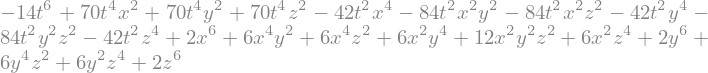

In [9]:
q34 = product(q3, q4)
D_q34 = Dq(q34, [t, x, y, z])
D_q34.display("q3 * q4")

The scalar is complicated, but the three zeros are simple. The product of two generalized analytic space-time functions is a generalized analytic space-time function.

To be honest, I am trying to avoid Riemann geometry. At no point in any of my efforts in physics have I ever used a metric tensor. My library has no capacity to handle indices, whether they are covariant or contravariant. Instead, I dream of a massive reconstruction project around space-time numbers, with an emphasis on _time_. Topology is all about distance - except in space-time when it has to be about duration.

An aspect of the design of the Qs library is that one cannot do a single operation that does not keep you in either the class Q of space-time numbers or space-time number series. Consider a simple pair of function, scalar() and vector(). Most people would create these to return one and three values respectively if given a space-time number. This creates problems for every other function in the library which would first have to test if it was given one value or three. Names are important, so if I define a function that is different from expectation, I add a \_q to the end, so scalar_q() and vector_q() like so:

```python
def scalar_q(q_1: Q) -> Q:
    """
    Returns the scalar (aka time) part of a space-time number as a space-time number.

    $ \rm{scalar_q}(q) = (q + q^*)/2 = (t, 0) $

    Returns: Q

    Args:
        q_1: Q

    Returns: Q

    """

    end_q_type = f"scalar_q({q_1.q_type})"
    s = Q([q_1.t, 0, 0, 0], q_type=end_q_type, representation=q_1.representation)
    return s

def vector_q(q_1: Q) -> Q:
    """
    Returns the vector (aka space) part of a space-time number as a space-time number.
    
    $ \rm{vector_q}(q) = (q\_1 - q\_1^*)/2 = (0, R) $

    Returns: Q

    """

    end_q_type = f"vector_q({q_1.q_type})"

    v = Q(
        [0, q_1.x, q_1.y, q_1.z],
        q_type=end_q_type,
        representation=q_1.representation,
    )
    return v
```


